In [4]:
import scipy 
import numpy as np
import matplotlib.pyplot as plt # used for visualization and plotting
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TASK 3 

In [5]:
df = pd.read_csv ('google_reviews.csv')
print('head:\n',df.head(5))
print("\n\n")
print('columns:\n',df.columns)
print("\n\n")
print('shape\n',df.shape)

head:
    Churches  Resorts  Beaches  Parks  Theaters  Museums  Malls  Zoo  \
0         0        0        1      1         1        0      1    0   
1         0        0        1      1         1        0      1    0   
2         0        0        1      1         1        0      1    0   
3         0        0        1      1         1        0      1    0   
4         0        0        1      1         1        0      1    0   

   Restaurants  Pubs/Bars  ...  Art Galleries  Dance Clubs  Swimming Pools  \
0            0          0  ...              0            0               0   
1            0          0  ...              0            0               0   
2            0          0  ...              0            0               0   
3            0          0  ...              0            0               0   
4            0          0  ...              0            0               0   

   Gyms  Bakeries  Beauty & Spas  Cafes  View Points  Monuments  Gardens  
0     0         0     

## Question 5
The algoritm will perform clustering based on 5454 instances. 

## Question 6
The data points are represented as a vector of 24 dimensions over F2 (binary)

## Question 7
Each data point is a vector of 24 binary values. 

(note: some literature define a data point as a single point <datum/ atomic info>, so by that definition, we have 24*5454 data points) 

# TASK 4
## methods:

In [6]:
def get_clusterer(points,k):
    clusterer = KMeans (n_clusters=k)
    preds = clusterer.fit_predict(points)
    return clusterer,preds

def show_results (clusterer, K):
    print('labels:', clusterer.labels_, '\n') 
    centers = clusterer.cluster_centers_
    print('centroids:')
    for i in range(K):
        print(i,':',centers[i,:],'\n')
    plt.figure(figsize=(45, 10))
    plt.grid(True)
    plt.xticks(fontsize=10)
    plt.legend(["Centroid 1", "Centroid 2", "Centroid 3", "Centroid 4"])
    for i in range(K):
        plt.plot(df.columns,centers[i,:])
    plt.show()   

def print_silheuette (df,preds, i):
    sil=silhouette_score (df, preds, metric=distance_metric)
    print('The silheuette of', i , 'clusters is:', sil, '\n')

def get_silheuettes(df,range_, metric='euclidean'):
    Silhouettes = []
    for k in range_:
        clusterer,preds=get_clusterer(df,k)
        Silhouettes.append(silhouette_score (df, preds, metric))
        #print_silheuette(df, preds, k)
    return Silhouettes

def show_silhouettes (Silhouettes, range_):
    plt.plot(range_, Silhouettes, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silheuettes')
    plt.title('Sillheuettes Vs, k')
    plt.show()


## Question 8
finding best num of clusters:

C:\Users\Yotga\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass metric=euclidean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yotga\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass metric=euclidean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yotga\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass metric=euclidean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yotga\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass metric=euclidean as keywor

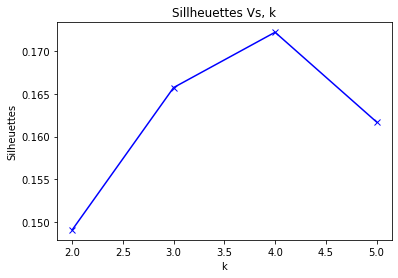

In [7]:
distance_metric='euclidean'
range_= range(2,6)
silheuettes= get_silheuettes(df, range_, distance_metric)
show_silhouettes(silheuettes, range_)

## Question 9
allocation to clusters of the first 2 and last 2 data points

In [8]:
clusterer,preds=get_clusterer(df,4)

first=df.iloc[:2]
last=df.iloc[-2:]
#print(clusterer.predict(df))
print("first two rows clusterer indexes are:")
print(clusterer.predict(first))
print("last two rows clusterer indexes are:")
print(clusterer.predict(last))



first two rows clusterer indexes are:
[3 3]
last two rows clusterer indexes are:
[2 2]


## Question 10

### Visual plot of the allocation to clusters by the features. Visual plot of the allocation to clusters by the features, 

labels: [3 3 3 ... 2 2 2] 

centroids:
0 : [0.02469136 0.13243547 0.04152637 0.02581369 0.1301908  0.14590348
 0.54320988 0.08305275 0.32659933 0.3030303  0.36363636 0.44219978
 0.65656566 0.96520763 0.664422   0.09427609 0.05948373 0.05387205
 0.07631874 0.07968575 0.00785634 0.02356902 0.00785634 0.0617284 ] 

1 : [0.01075269 0.18339307 0.09199522 0.11290323 0.24611708 0.54540024
 0.92054958 0.84050179 0.96893668 0.76105137 0.47729988 0.07885305
 0.1218638  0.17502987 0.31242533 0.03942652 0.00716846 0.00358423
 0.00477897 0.02150538 0.00358423 0.09438471 0.04301075 0.01135006] 

2 : [0.11203008 0.28120301 0.25864662 0.16917293 0.02706767 0.01428571
 0.0924812  0.01428571 0.13383459 0.05112782 0.01654135 0.0075188
 0.01654135 0.06992481 0.28947368 0.15037594 0.14135338 0.12105263
 0.23383459 0.22105263 0.14661654 0.3593985  0.22932331 0.20601504] 

3 : [6.41436818e-03 2.28351507e-01 4.16292495e-01 7.84477229e-01
 9.69211033e-01 7.09429121e-01 5.74085953e-01 8.08210391e-02
 1.52020526

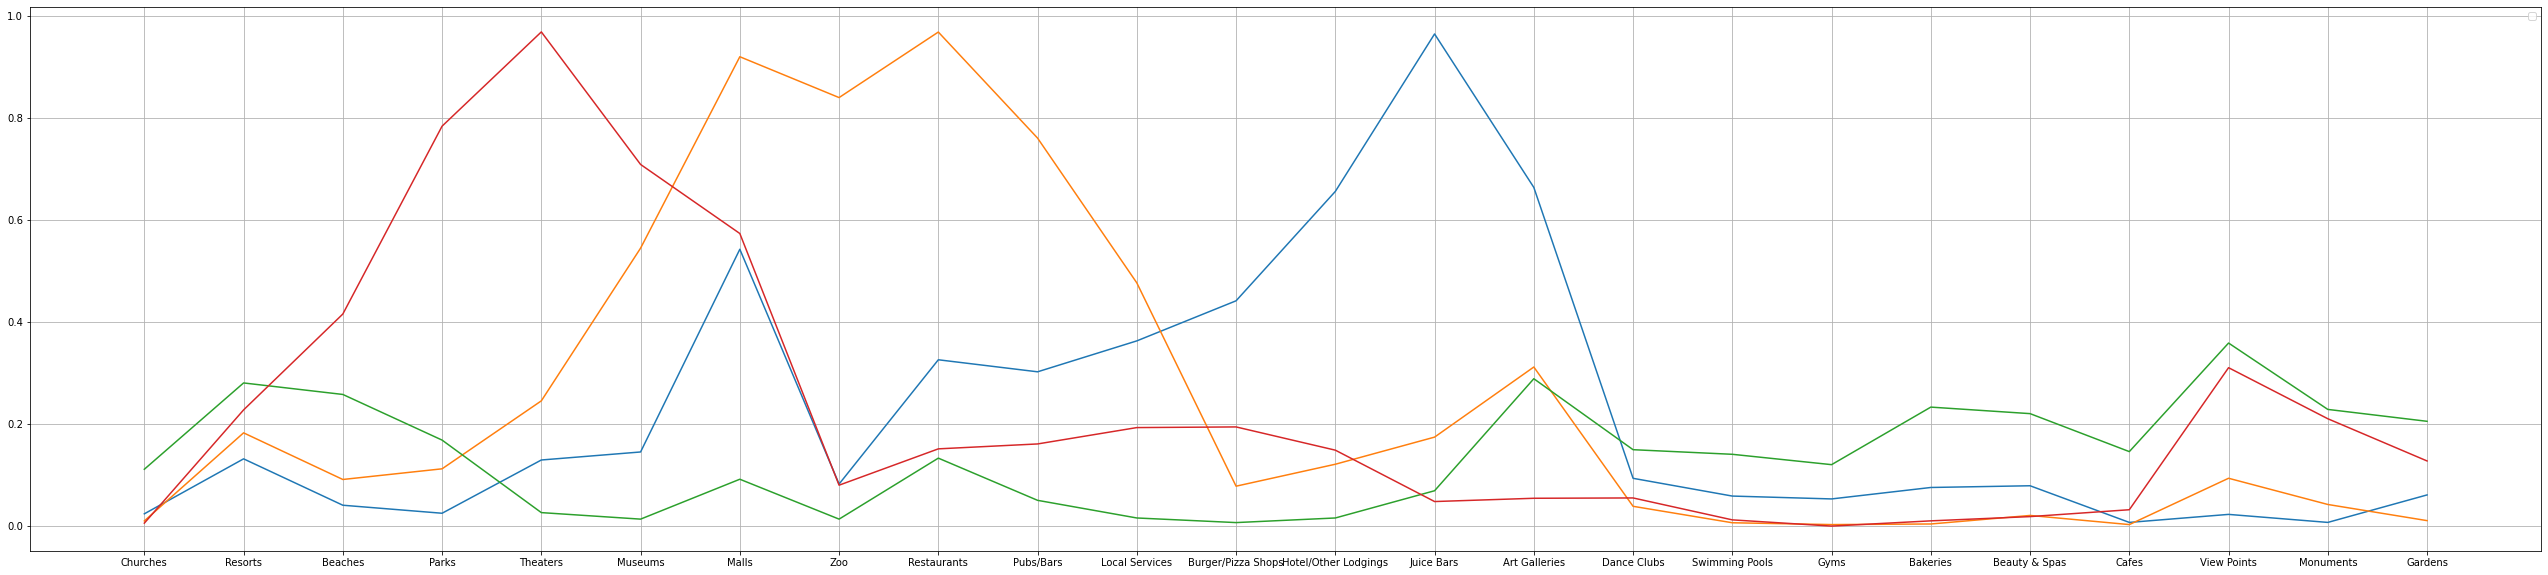

Download the picture for clear labels


In [9]:
show_results(clusterer, 4)
#clusterer.labels_
print("Download the picture for clear labels")

### 

### As we can see, each plot (colored line in the graph above) represents the properties of each centroid. generally speaking we can divide our data to 4 diffrent groups by they preferences: 
1. parks, theaters, museums
2. Malls, Juice bars (not very strong statistical connection)
3. Malls, Zoo, Restaurants
4. And acoording to the last centroid, which has a less than 0.4 in all of its coordinates (weak connection)- Art Galleries, Resorts, Viewpoints.  